<a href="https://colab.research.google.com/github/itsukishindo/IYS_AI_transport/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)



{'C': 0.01}
Accuracy: 0.5762987012987013
Precision: [0.55244755 0.25       0.49056604 0.66536965]
Recall: [0.57246377 0.04545455 0.52791878 0.66023166]


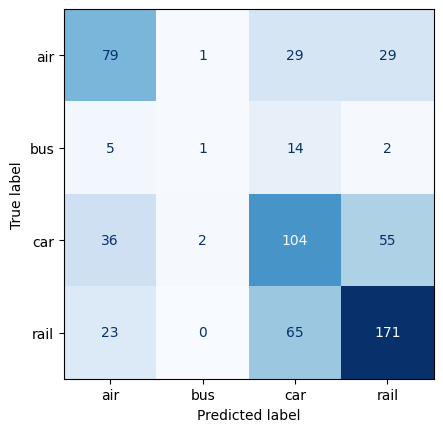

In [ ]:
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(1)LR
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(max_iter=1000, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'C': 10}
Accuracy: 0.5698051948051948
Precision: [0.56521739 0.25       0.48292683 0.64312268]
Recall: [0.56521739 0.04545455 0.50253807 0.66795367]


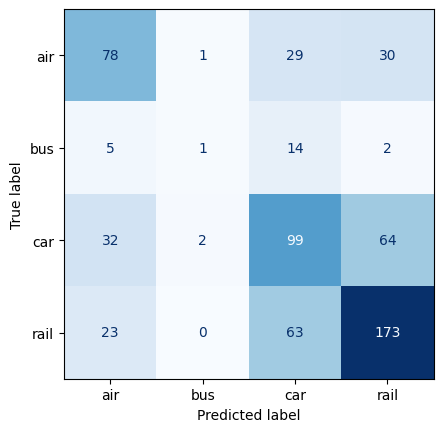

In [ ]:
#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(1)LR
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(max_iter=1000, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'C': 0.1}
Accuracy: 0.5665584415584416
Precision: [0.55555556 0.25       0.46859903 0.65517241]
Recall: [0.57971014 0.04545455 0.49238579 0.66023166]


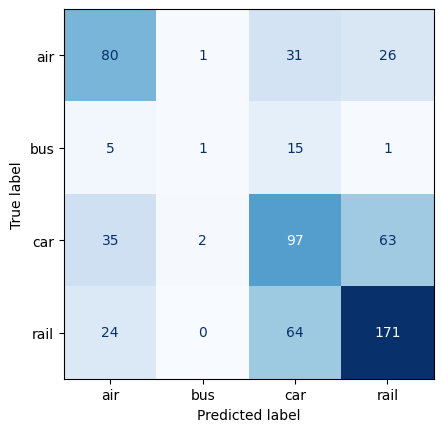

In [ ]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(1)LR
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(max_iter=1000, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.5324675324675324
Precision: [0.49710983 0.         0.4301676  0.64705882]
Recall: [0.62318841 0.         0.39086294 0.63706564]


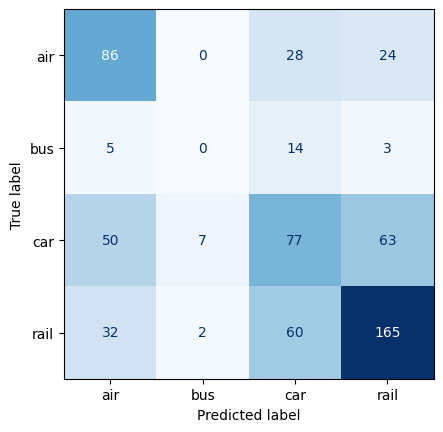

In [ ]:
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(2)KNN
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
model=KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.487012987012987
Precision: [0.46896552 0.25       0.38378378 0.56737589]
Recall: [0.49275362 0.04545455 0.36040609 0.61776062]


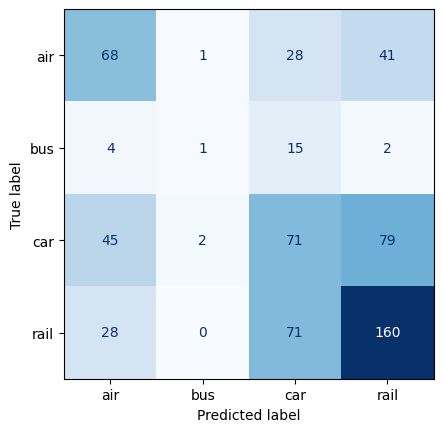

In [ ]:
#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(2)KNN
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
model=KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.487012987012987
Precision: [0.46896552 0.25       0.38378378 0.56737589]
Recall: [0.49275362 0.04545455 0.36040609 0.61776062]


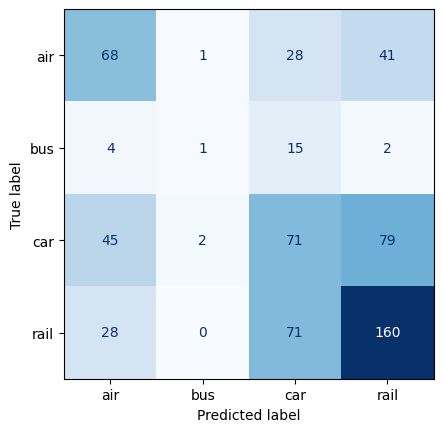

In [ ]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(2)KNN
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
model=KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.5113636363636364
Precision: [0.49635036 0.25       0.4120603  0.5942029 ]
Recall: [0.49275362 0.04545455 0.41624365 0.63320463]


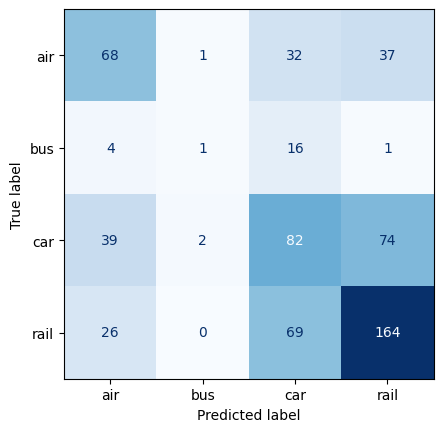

In [ ]:
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(3)RF
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.5162337662337663
Precision: [0.49635036 0.25       0.42156863 0.60147601]
Recall: [0.49275362 0.04545455 0.43654822 0.62934363]


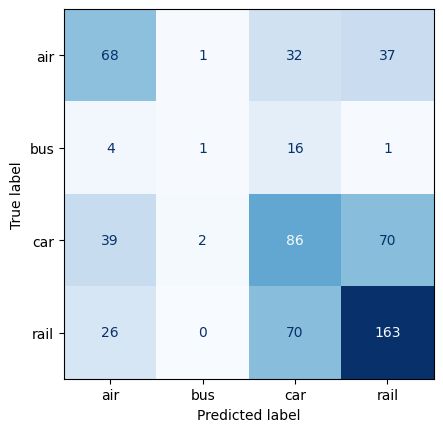

In [ ]:
#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(3)RF
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.5097402597402597
Precision: [0.48091603 0.16666667 0.41826923 0.60147601]
Recall: [0.45652174 0.04545455 0.44162437 0.62934363]


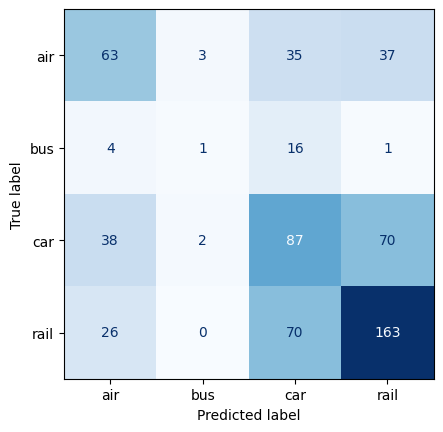

In [ ]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(3)RF
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


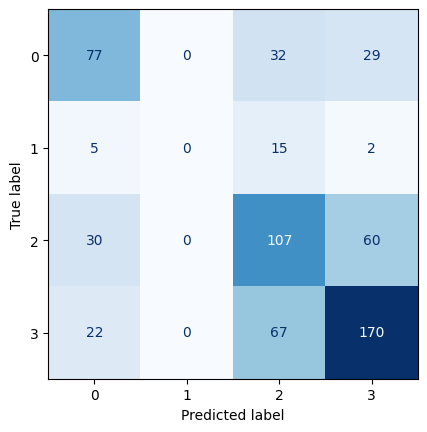

In [ ]:
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(4)XGBoost
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


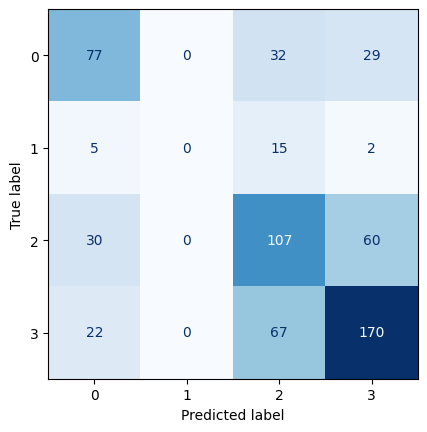

In [ ]:
#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(4)XGBoost
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


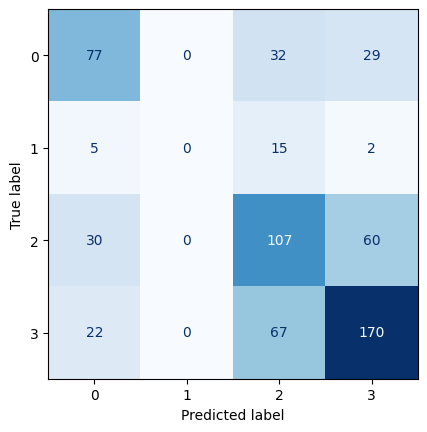

In [ ]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(4)XGBoost
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'C': 0.1}
Accuracy: 0.564935064935065
Precision: [0.54861111 0.         0.4556962  0.68510638]
Recall: [0.57246377 0.         0.54822335 0.62162162]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


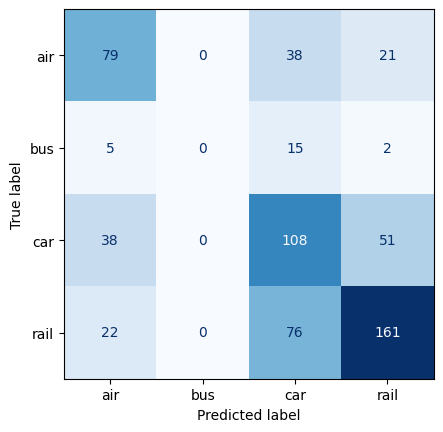

In [ ]:
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(5)SVM
#Note: It will costs a long time.
params = {
   'C': [0.1, 1, 10],
}

model= SVC(kernel="linear")

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'C': 0.1}
Accuracy: 0.551948051948052
Precision: [0.51948052 0.         0.45959596 0.64015152]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: [0.57971014 0.         0.46192893 0.65250965]


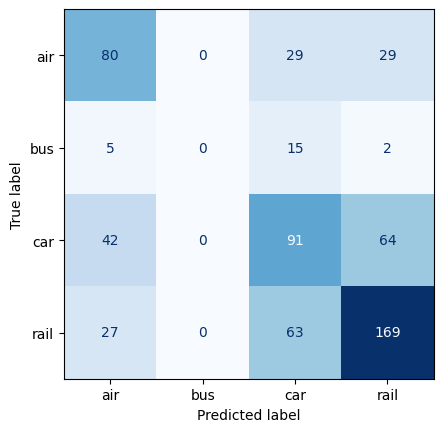

In [ ]:
#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#(5)SVM
#Note: It will costs a long time.
params = {
   'C': [0.1, 1, 10],
}

model= SVC(kernel="linear")

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'C': 1}
Accuracy: 0.5584415584415584
Precision: [0.53956835 0.         0.45851528 0.66129032]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: [0.54347826 0.         0.53299492 0.63320463]


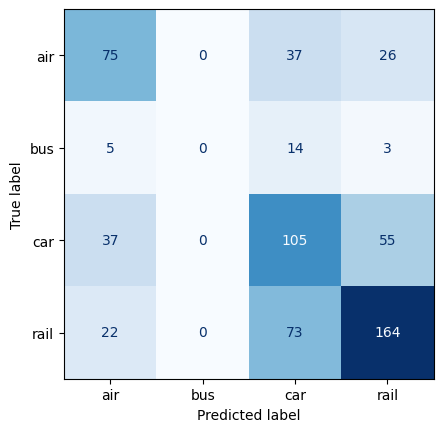

In [ ]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(5)SVM
#Note: It will costs a long time.
params = {
   'C': [0.1, 1, 10],
}

model= SVC(kernel="linear")

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


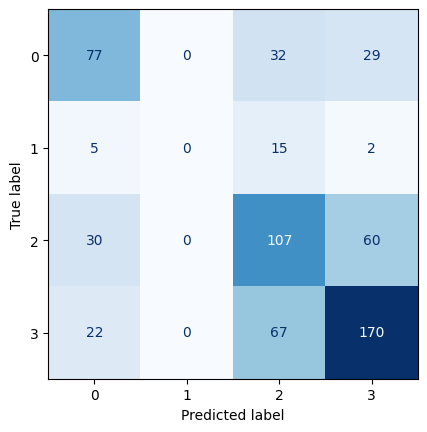

In [ ]:
##---------------------The choice of encoding method---------------------------
#(1) One-Hot Encoding
#df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
# encoder = LabelEncoder()
# df=data.copy()
# df['service_air'] = encoder.fit_transform(df['service_air'])
# df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

##---------------------The choice of classification model---------------------------
#(1)LR
#params = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#}
#model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
# params = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
# }
# model=KNeighborsClassifier()

#(3)RF
# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# model = RandomForestClassifier(random_state=0)

#(4)XGBoost
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

#(5)SVM
## Note: It will costs a long time.
#params = {
#    'C': [0.1, 1, 10],
#}

#model= SVC(kernel="linear")

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')